In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.misc import derivative

In [3]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [4]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

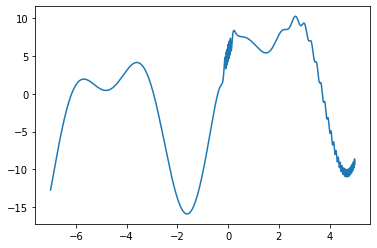

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

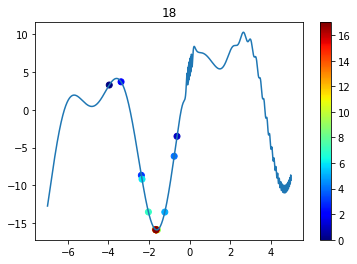

In [10]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

In [33]:
def gradient_descent(function, X, max_it):
    x = X
    index = np.random.randint(0, len(x)) # randomly select an index to sample a point
    point = x[index] # sample a point to start
    derivative_in_point = derivative(function, point)
    it = 0 # current iteration
    max_it = 100 # set the max number of iterations to avoid infinite loops
    points = [] # list of the points we have inspected
    threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
    while np.abs(derivative_in_point)> 0.01 and it<max_it: 
        if derivative_in_point < 0: # the slope is negative
            x = x[index:] # since the slope is negative, the local minimum should be on the right
            index = np.random.randint(0, len(x)) # randomly select an index
            point = x[index] # sample the next point in the new interval
            points.append(point) # store for later
            derivative_in_point = derivative(function, point) # compute the derivative in the new point
        else:
            x = x[0:index+1] # the slope is positive, so the minimum should be on the left
            index = np.random.randint(0, len(x))
            point = x[index]
            points.append(point)
            derivative_in_point = derivative(function, point)
        it +=1
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()

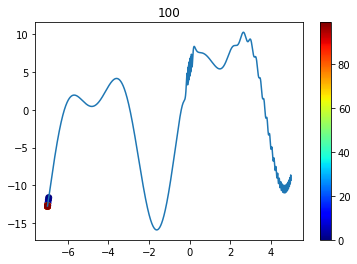

In [35]:
gradient_descent(function, X, 100)

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [6]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [7]:
area_under_the_curve = result[0]

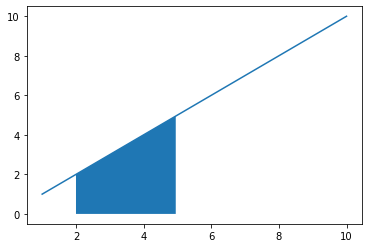

In [8]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


In [13]:
from scipy import integrate
a, b = [2,5]

def f(x):
    return x+5-x


result = integrate.quad(f, a, b)
result

(15.0, 1.6653345369377348e-13)

1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

In [14]:
area_under_constant = result[0]

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

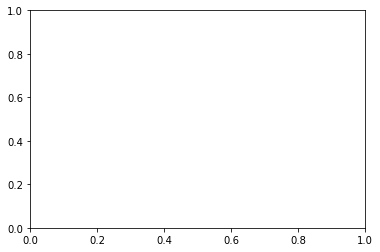

In [16]:
x = np.linspace(1, 10, 100)
section = np.arange(2, 5, 1/20)
for num in range(len(x)):
    plt.plot(x, function)
    plt.fill_between(section, f(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

In [17]:
a, b = [-1,1]

def ratio_of_1_x(x):
    return 1/(x+1e-9)

In [18]:
result_ratio = integrate.quad(ratio_of_1_x, a, b)

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

In [20]:
a, b = [-np.pi, np.pi]

def sin_ratio(x):
    return np.sin(x)

integrate.quad(sin_ratio, a, b)

0.0

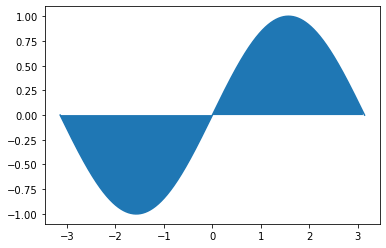

In [22]:
x = np.linspace(-np.pi, np.pi, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, sin_ratio(x))
plt.fill_between(section, sin_ratio(section))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


In [23]:
a, b = [-np.pi, np.pi]

def cos_ratio(x):
    return np.cos(x)

integrate.quad(cos_ratio, a, b)

(2.615901373506474e-16, 4.471737093238828e-14)

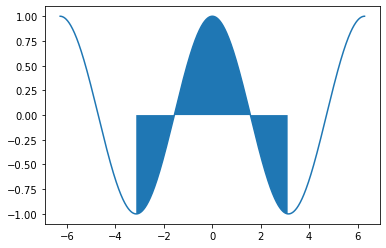

In [24]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, cos_ratio(x))
plt.fill_between(section, cos_ratio(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

In [25]:
a, b = [-np.pi, np.pi]

def sin_cos_function(x):
    return np.sin(x) - np.cos(2*x)

integrate.quad(sin_cos_function, a, b)

(5.231802747012948e-16, 4.085699506880975e-09)

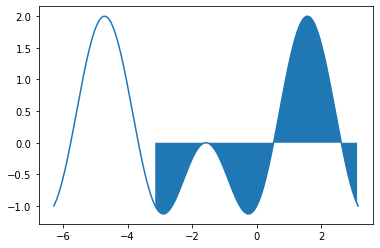

In [26]:
x = np.linspace(-2*np.pi, np.pi, 1000)
section = np.arange(a, b, 1/20)
plt.plot(x, sin_cos_function(x))
plt.fill_between(section, sin_cos_function(section))